In [1]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import os

In [9]:
# Read the CSV
heart = pd.read_csv("cleaned_cardio.csv")
heart.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI
0,50.0,2,66.0,136.0,110,80,1,1,0,0,1,0,21.948577
1,55.0,1,61.0,187.0,140,90,3,1,0,0,1,1,35.329481
2,52.0,1,65.0,141.0,130,70,3,1,0,0,0,1,23.461065
3,48.0,2,67.0,180.0,150,100,1,1,0,0,1,1,28.188906
4,48.0,1,61.0,123.0,100,60,1,1,0,0,0,0,23.238108


In [11]:
y = heart["cardio"]
target_names = ["negative", "positive"]

In [12]:
X = heart.drop("cardio", axis=1)
X.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,BMI
0,50.0,2,66.0,136.0,110,80,1,1,0,0,1,21.948577
1,55.0,1,61.0,187.0,140,90,3,1,0,0,1,35.329481
2,52.0,1,65.0,141.0,130,70,3,1,0,0,0,23.461065
3,48.0,2,67.0,180.0,150,100,1,1,0,0,1,28.188906
4,48.0,1,61.0,123.0,100,60,1,1,0,0,0,23.238108


In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

k: 1, Train/Test Score: 0.958/0.632
k: 3, Train/Test Score: 0.811/0.673
k: 5, Train/Test Score: 0.777/0.691
k: 7, Train/Test Score: 0.762/0.697
k: 9, Train/Test Score: 0.753/0.704
k: 11, Train/Test Score: 0.748/0.710
k: 13, Train/Test Score: 0.743/0.713
k: 15, Train/Test Score: 0.741/0.715
k: 17, Train/Test Score: 0.739/0.717
k: 19, Train/Test Score: 0.738/0.717


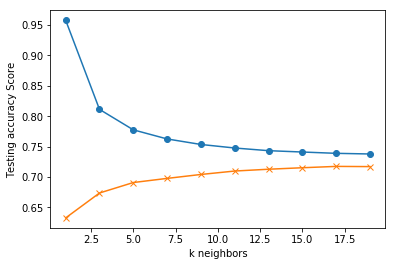

In [14]:
# Loop through different k values to see which has the highest accuracy
# Note: We only use odd numbers because we don't want any ties
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_score = knn.score(X_train, y_train)
    test_score = knn.score(X_test, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [17]:
# Note that k: 13 seems to be the best choice for this dataset
knn = KNeighborsClassifier(n_neighbors=13)
knn.fit(X_train, y_train)
print('k=13 Test Acc: %.3f' % knn.score(X_test, y_test))

k=13 Test Acc: 0.713
